# 收益率的分布


+ 我们前面讨论了收益率和价格指数的不可预测性，分析了其可能具有随机游走或者几何随机游走的性质。
+ 对随机游走的独立增量，即单期对数收益率，一般设定其满足正态分布。但我们也做了初步的分析，在大多数情形下，正态分布设定可能是不准确的。 特别在两端，即大的损失和收益，用正态分布可能也不恰当。
+ 那么，问题是：对数收益率(或者收益率)究竟满足什么样的分布呢？

我们这一讲将包含如下内容：

+ 分析收益率分布的图形工具，
+ 常见的分布
+ 分布参数的估计

## 分析收益率分布的图形工具
将数据可视化，即利用图形工具能增加我们对收益率直观的，整体的认识。这些图形工具包括：

+ 直方图
+ QQ 图，(我们已经介绍了)
+ Box and whisker plots（箱形图，盒须图）

### 直方图 

利用直方图，我们能对收益率有一个整体的认识。一般来说，收益率分布形态上近似正态分布，像一个倒扣掉的钟形。

画直方图的步骤：

1. 确定数据的取值范围，
2. 将数据分为若干等距区间， 
3. 统计在每个区间内的频数或比例 
4. 以数据的取值为横坐标，相应等距区间内数据频数或比例为纵坐标，画二维图。

+ 当然我们也可以不要求等距，不过此时需要对纵坐标调整，使得相应区间的面积和频数成比例。

+ 对一个pandas Series对象，利用其方法.hist() 就可产生其直方图。
+ 该方法的众多参数中，最重要的是选择数据区间的数量，该数量的选择和数据量有关，比方三年的日交易数据，选50就比较合适。

下面我们给出最近三年的上证指数的收益率直方图

In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
np.random.seed(1)
#plt.style.use('ggplot')


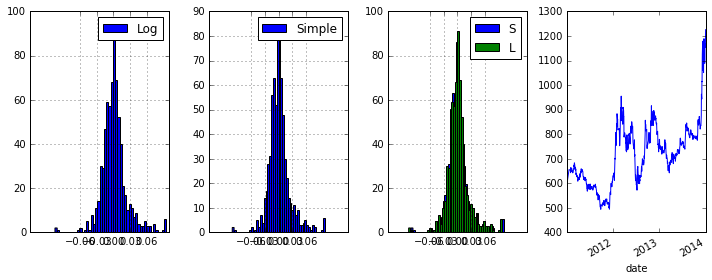

In [2]:
shindex=pd.read_csv("data/000001.csv",index_col=0,parse_dates=True)
shindex=shindex.ix["2012":"2014"]["close"]

ret=shindex.pct_change()
logret=(1+ret).map(np.math.log)
fig = plt.figure(figsize=(10,4))
xticks=np.linspace(-0.06,0.06,5)
ax = fig.add_subplot(1,4,1)
logret.hist(bins=50,label="Log")
ax.set_xticks(xticks)
plt.legend()
ax = fig.add_subplot(1,4,2)
ret.hist(bins=50,label="Simple")
ax.set_xticks(xticks)
plt.legend()
ax = fig.add_subplot(1,4,3)
ret.hist(bins=50,label="S")
logret.hist(bins=50,label="L")
ax.set_xticks(xticks)
plt.legend(loc="best")
ax = fig.add_subplot(1,4,4)

xticks = pd.date_range("2012-1-1", "2014-12-31", freq='A')
shindex.plot(xticks=xticks.to_pydatetime())
ax.set_xticklabels([x.strftime('%Y') for x in xticks])

fig.tight_layout()


从这个图可以看出：
+  收益率在0周围
+ 数据轻微右偏(均值大于中位数)，但又更多的极端负值（因为选取的三年是股市上升期）
+ 近似有正态形状

In [3]:
ret.dropna().describe()

count    725.000000
mean       0.000613
std        0.011155
min       -0.054296
25%       -0.005476
50%        0.000305
75%        0.006173
max        0.043245
Name: close, dtype: float64

In [4]:
 ret.describe(percentiles=[0.005, 0.025,0.16])

/Applications/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    725.000000
mean       0.000613
std        0.011155
min       -0.054296
0.5%            NaN
2.5%            NaN
16%             NaN
50%             NaN
max        0.043245
Name: close, dtype: float64

这里也可以通过标准差和各分位点的关系判断正态性。。。。

### 画多个收益率序列的直方图

In [5]:
stocks=pd.read_pickle("data/Mystock.pkl")


从上述数据中取出四只股票： 平安银行,吉林敖东，农业银行，宝新能源，2012年至2014年的收盘价，计算简单日收益率并画出各自的直方图。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113088390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118a30ba8>]], dtype=object)

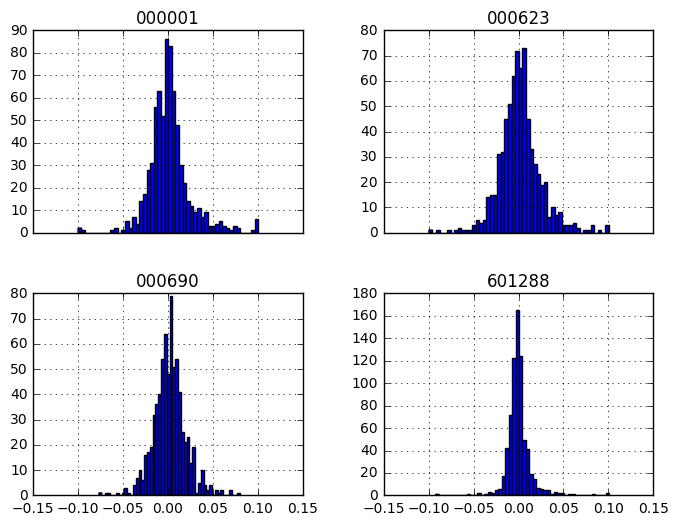

In [6]:
ss=stocks.ix[["000001","000623","601288","000690"],"2012":"2014","close"]
##ss.columns=["平安银行","吉林敖东","农业银行","宝新能源"]
ret=ss.pct_change()
ret.hist(bins=50, sharex=True, figsize=(8,6))
 

上面hist参数的含义，以及我们从上图可以看出不同股票的收益率特征。。。

### Box and whisker 

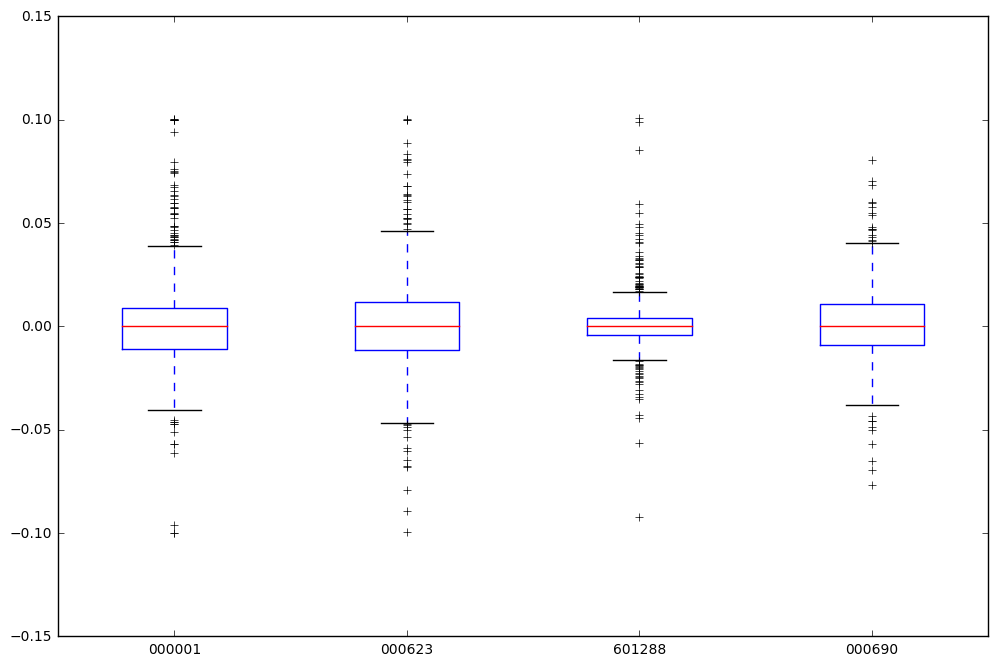

In [9]:
ret.plot(kind='box',figsize=(12,8))
# IQR,1.5IQR

## 常见的描述收益率的分布

通常我们讨论的分布都可以由若干个参数确定。设随机变量$X$ 的分布密度为$f(x)$。

+ 位置参数

改变位置参数时分布将发生左移或右移，而不会改变它的形态或标准差。随机变量  $Y=X+\mu$的 分布密度为$f(y-\mu)$。$\mu$ 为位置参数。

+ 刻度参数

刻度参数描述分布的标准差的倍数。直观上将分布密度整体放大或缩小。从随机变量来说，$Y=\theta X$的分布密度 $\theta^{-1}f(y/\theta),\theta>0$。 $\theta$ 为刻度参数。

$\theta X+\mu$的分布为${\theta ^{ - 1}}f\left\{ {\left( {x - \mu } \right)/\theta } \right\},\theta  > 0$，其中$\mu$为位置参数，$\theta$为刻度参数。通常的准化就是通过设置位置参数和刻度参数使分布其期望和方差变为0和1.

+ 形态参数

 形态参数描述分布的形状，它确定了分布的形态，其是描述分布特性的重要参数。

### 正态分布

最常用的标准正态分布 $f(x)=\frac{1}{\sqrt{2\pi}}\exp(-\frac{x^2}{2})$, 分布对称。 我们下面看看当$x=-5,-4,-3,-2,-1,0$ 时 $P(X\leq x)$的值：



In [3]:
import scipy.stats as stats 

这里我们导入了scipy模块中的统计包，里面包含了很多分布函数和统计函数。

,-5,-4,-3,-2,-1,0
cdf,2.866516e-07,0.000032,0.00135,0.02275,0.158655,0.5


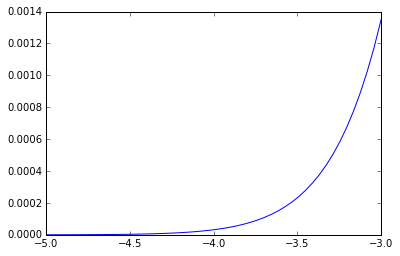

In [4]:
x=np.arange(-5,1)
cdfn=stats.norm.cdf(x)
res=pd.DataFrame(cdfn,index=map(str,x),columns=["cdf"])
x=np.linspace(-5,-3) #  default 50 intervals
plt.plot(x,stats.norm.cdf(x))
res.T

**厚尾分布**

+ 可以看出，标准正态分布取得较大绝对值的概率非常非常小。绝对值大的数在坐标横坐标的两边，因此我们说这样的分布尾很薄。
+ 从分布密度形态上来说，这样的分布密度在两尾迅速的趋于0. 对正态分布来说，密度以快于负指数，即以$exp(-x^2)$的速度趋于零。 

+ 考虑指数分布 其密度$\lambda\exp(-\lambda x)$ 的尾部，右端是以负指数收敛到0的。
+ 显然负指数上为二次函数的正态分布在坐标两端衰减得更快。从而指数分布随机变量取得较大值的概率大于正态分布.
+ 金融中描述这种现象的术语为厚尾。指数分布的尾比正态分布厚。
+ 如果随机变量描述盈利或损失，则尾厚的分布表明发生大的损失或收益的概率大，这类分布在金融数据分析中具有重要的作用。
+ 在理论上，有时利用指数分布来定义厚尾分布， 如果某分布的尾比指数分布的厚就被称为厚尾分布。

### 	偏度和峰度

+ 偏度和峰度常用来描述分布的形态。
+ 偏度度量分布的对称性，如果分布对称，偏度为0，如果偏度为正则表明分布具有更长的右尾，如果偏度为负则分布具有更长的左尾。
+ 尾指远离中心的区域，通常在均值的两倍标准差外。而峰度刻画有多少概率集中在分布的中心，或者尾部，而不是集中“肩部”。这里中心一般指均值的一倍标准差内区域，“肩部”指距均值一倍标准差和两倍标准差之间的区域。

偏度和峰度度量分布的形态，它和分布的位置参数和刻度参数无关，其定义如下：
 
 $$S = E{\left\{ {\frac{{X - E\left( X \right)}}{\sigma }} \right\}^3} = \frac{{E{{\left\{ {X - E\left( X \right)} \right\}}^3}}}{{{\sigma ^3}}}$$
 
二项分布的偏度为 $S = \frac{{1 - 2p}}{{\sqrt {np\left( {1 - p} \right)} }}$
 
据此可以分析偏度 和分布左偏，右偏的关系。

峰度定义如下：
 
 $$K = E{\left\{ {\frac{{X - E\left( X \right)}}{\sigma }} \right\}^4} = \frac{{E{{\left\{ {X - E\left( X \right)} \right\}}^4}}}{{{\sigma ^4}}}$$
 
 + 关于标准正态分布随机变量$Z$的距有如下结论：

${E}\left(Z^{n+1}\right) = n{E}\left(Z^{n-1}\right)$

因此有：

$${E} \left( Z^{2 n} \right) = 1 \cdot 3 \cdots (2n - 1) = (2  n)! \big/ (n! 2^n),\quad E(Z^4)=3$$

+ 证明：

标准正态分布的密度函数为 $\phi(z) = \frac{1}{\sqrt{2 \, \pi}} e^{-\frac{1}{2} z^2}, \quad z \in \mathbb{R}$,有
$$\phi^\prime(z) = - z \phi(z)$$

并且
$$E\left(Z^{n+1}\right) = \int_{-\infty}^\infty z^{n+1} \phi(z) \, dz = \int_{-\infty}^\infty z^n z \phi(z) \, dz = - \int_{-\infty}^\infty z^n \phi^\prime(z) \, dz$$

由分步积分
$$E\left(Z^{n+1}\right) = -z^n \phi(z) \bigg|_{-\infty}^\infty + \int_{-\infty}^\infty n z^{n-1} \phi(z) \, dz = 0 + n E\left(Z^{n-1}\right)$$

 

+ 正态分布的峰度为3，定义$K - 3$ 为超额峰度，它给出分布和正态分布的差距。一般来说，峰度越大，分布的尾越厚。
+ 指数分布的偏度为2，峰度为9。峰度和偏度不受位置参数和刻度参数的影响。
+ 对数正态分布的偏度为$\left( {{e^{{\sigma ^2}}} + 2} \right)\sqrt {{e^{{\sigma ^2}}} - 1} $，超额峰度为：$e^{4\sigma^2}\!\! + 2e^{3\sigma^2}\!\! + 3e^{2\sigma^2}\!\! - 6$
 

 偏度和峰度可以用样本估计，其估计量分别为：
 $$\hat S = \frac{1}{n}{\sum\limits_{i = 1}^n {\left( {\frac{{{X_i} - \bar X}}{{\hat \sigma }}} \right)} ^3}$$
 $$\hat K = \frac{1}{n}{\sum\limits_{i = 1}^n {\left( {\frac{{{X_i} - \bar X}}{{\hat \sigma }}} \right)} ^4}$$
其中$\bar X$ 为样本均值， $\hat \sigma $为样本标准差。
   需要指出的是，偏度和峰度的计算对异常点非常敏感。比方我们随机生成1000个标准正态随机数，引入异常点，将其中一个替换为30。计算偏度和峰度发现偏度大约为10，峰度大约为243。显然和正态分布的偏度和峰度有很大的差别。

### 几种厚尾分布

下面我们着重介绍几种厚分布

+ t分布
+ GED分布,(广义正态分布)
+ Pareto 分布

下面导入这几个分布

In [5]:
from scipy.stats import  t,  gennorm, pareto,norm

#gennorm 在 0.16 版本中才有，需要用 conda install scipy 更新

#### t 分布



定义：如果$Z\sim N\left( {0,1} \right)$ ，$W\sim\chi_v^2$ ，并且$Z,W$ 独立，则$Z/\sqrt {W/v} $ 服从自由度为$v$ 的t分布，记为${t_v}$ 。

其密度为：

$$f(t) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{-\frac{\nu+1}{2}},\!$$

其中$\Gamma(n)=n\Gamma(n-1),\quad\Gamma\left(\tfrac{1}{2}\right)=\sqrt{\pi},\Gamma(1)=1$。

$t$分布 的期望为0，当$v > 2$ 时方差为$v/\left( {v - 2} \right)$ ，此时我们可以定义变量 

$$\mu  + \frac{{\sigma X}}{{\sqrt {v/\left( {v - 2} \right)} }}$$
 
该变量的期望为$\mu$ ，方差为$\sigma^2$ ，我们将其分布记为${t_v}\left( {\mu ,{\sigma ^2}} \right)$ ，其中位置参数为 $\mu$，刻度参数为$\sigma $ ， $v$ 为形态参数。显然，${t_v}$  相当于 ${t_v}\left( {0,v/\left( {v - 2} \right)} \right)$，其并不是标准化的分布，$\frac{{X}}{{\sqrt {v/\left( {v - 2} \right)} }}$ 才是期望为0，方差为1的分布。

当$v > 4$ 时，自由度为 的t分布的峰度为
 $$K\left( v \right) = 3 + \frac{6}{{v - 4}}$$
 
显然，此时t分布的峰度大于3，并且自由度越小，尾越厚，当$v < 4$ 的尾非常厚，以至于其峰度无穷大，其实就是4阶距无穷大。设位置参数和刻度参数为0和1，则t分布的密度正比于
    $$\frac{1}{{{{\left( {1 + {x^2}/v} \right)}^{\left( {v + 1} \right)/2}}}}$$

当$|x|$ 很大时，近似有
 
 $$\frac{1}{{{{\left( {1 + {x^2}/v} \right)}^{\left( {v + 1} \right)/2}}}} \propto |x{|^{ - \left( {v + 1} \right)}}$$
 
因此，t分布具有多项式尾，但其尾参数都为整数，这限制了该分布在金融数据建模中的应用。

注：这里介绍的都是中心t分布及其线性变换，还有一种非中心t分布其定义为：$Z\sim N\left( {\delta ,1} \right)$ ，$W\sim\chi _v^2$ ，并且 $Z,W$独立，则$Z/\sqrt {W/v} $ 服从自由度为$v$ 的非中心t分布，记为 ${t_v}\left( \delta  \right)$.

In [6]:
  
def tstats(v):
    return list(t.stats(v,moments='mvsk'))

vlist=[3,5,6,10,100]
a=list(map(tstats,vlist))
pd.DataFrame(a,index=map(str,vlist),columns=["mean","var","skew","kurt"])
 

,mean,var,skew,kurt
3,0.0,3.0,nan,nan
5,0.0,1.6666666666666667,0.0,6.0
6,0.0,1.5,0.0,3.0
10,0.0,1.25,0.0,1.0
100,0.0,1.0204081632653061,0.0,0.0625


array([ 0.0189,  0.0286,  0.0477,  0.0918,  0.2113,  0.5   ])

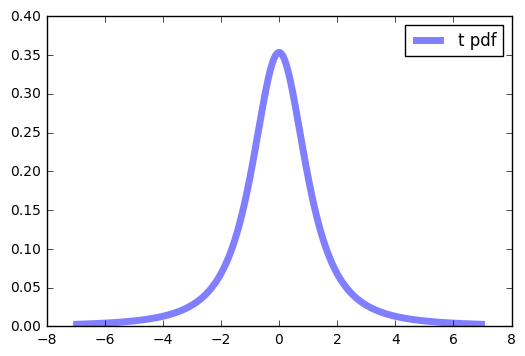

In [36]:
v=2
x = np.linspace(t.ppf(0.01, v), t.ppf(0.99, v), 800)
plt.plot(x, t.pdf(x, v), 'b-', lw=5, alpha=0.5, label='t pdf')
plt.legend()
t.cdf(np.arange(-5,1),v)


####  GED 分布

ged分布是广义误差分布（Generalized error distribution 或 Exponential power distribution，Generalized normal distribution），是一种连续概率分布，使用尺度参数$\alpha$和指数$\beta$。它的概率密度为：
 
$$\frac{\beta}{2\alpha\Gamma(1/\beta)} \; e^{-(|x-\mu|/\alpha)^\beta}$$

其中$\beta$是形态参数，$\mu,\alpha$分别为位置参数和刻度参数。

当$\beta= 1$时，即缩减成一个拉普拉斯分布。

$$\frac{1}{2\alpha} \; e^{-(|x-\mu|/\alpha)}$$

当$\beta = 2, \alpha=\sqrt{2}$时,分布是一个正态分布。


$$\frac{1}{\sqrt{2\pi}} \; e^{-(|x-\mu|/2)^2}$$

当 $\textstyle\beta\rightarrow\infty$, 分布密度收敛到$\textstyle (\mu-\alpha,\mu+\alpha)$上的均匀分布。

该分布族可以描述尾不正态分布厚的分布(当 $\beta<2$)，也可以描述尾较正态分布薄的分布(当 $\beta>2$)。
当$\beta$越来越大，尾部越来越薄，最后会趋于有限区间上的均匀分布（尾部消失）。

In [13]:
gennorm?

In [14]:
def gevstats(b):
    return list(gennorm.stats(b,moments='mvsk'))

alist=[1,2,3,4]
x=map(gevstats,alist)
pd.DataFrame(x,index=map(str,alist),columns=["mean","var","skew","kurt"])

,mean,var,skew,kurt
1,0.0,2.0,0.0,3.0
2,0.0,0.5,0.0,-4.4408920985e-16
3,0.0,0.373282173907,0.0,-0.581600847688
4,0.0,0.337989120034,0.0,-0.811560384774


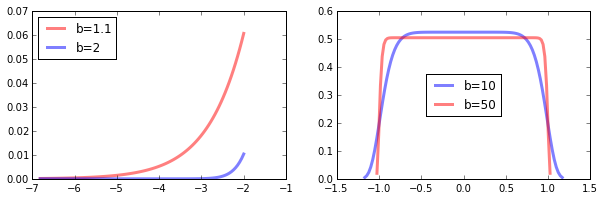

In [15]:
b=1.1
x = np.linspace(gennorm.ppf(0.0001, b), gennorm.ppf(0.05,b), 100)
fig = plt.figure(figsize=(10,3))
ax=fig.add_subplot(1,2,1)
plt.plot(x, gennorm.pdf(x,b), 'r-', lw=3, alpha=0.5, label='b=1.1')

b=2
plt.plot(x, gennorm.pdf(x, b), 'b-', lw=3, alpha=0.5, label='b='+str(b))
plt.legend(loc="best")

ax=fig.add_subplot(1,2,2)

b=10
x = np.linspace(gennorm.ppf(0.0001, b), gennorm.ppf(0.9999,b), 100)
plt.plot(x, gennorm.pdf(x, b), 'b-', lw=3, alpha=0.5, label='b='+str(b))
b=50
x = np.linspace(gennorm.ppf(0.0001, b), gennorm.ppf(0.9999,b), 100)

plt.plot(x, gennorm.pdf(x, b), 'r-', lw=3, alpha=0.5, label='b='+str(b))

plt.legend(loc="center")


进一步从分位点数字来看看尾的厚度。我们设定$\beta=1.1$,方差为  $\frac{\alpha^2\Gamma(3/\beta)}{\Gamma(1/\beta)}$,则取刻度参数 $\alpha=\sqrt{\frac{\Gamma(1/\beta)}{\Gamma(3/\beta)}}\approx 1.2565$时，方差为1. 这样我们就可以和标准正态分布的尾分布进行比较。

In [16]:
import math
a=math.sqrt(math.gamma(3/1.1))
a

1.2565

In [17]:
b=1.1
x=np.arange(-5,1)
gn=gennorm.cdf(x,b,scale=a)
n=norm.cdf(x)
data=np.vstack([gn,n])
data=pd.DataFrame(data,columns=x,index=["GED CDF","Norm CDF"])
data
 

,-5,-4,-3,-2,-1,0
GED CDF,4.186026e-03,0.011526,0.031091,0.081765,0.207871,0.5
Norm CDF,2.866516e-07,0.000032,0.001350,0.022750,0.158655,0.5


###	Pareto 分布

Pareto分布的分布密度为:

 $$ f\left( x \right) = \frac{{\beta }}{{{x^{\beta  + 1}}}},\quad x > 1,$$


观察该分布尾部的衰减速度，显然其是多项式的，比负指数慢很多。 从积分可以看出来，pareto分布的矩可能不存在。比如，如果$m\geq \beta$，m阶矩就不存在了。因为$\int_1^\infty \frac{\beta}{x^{m-\beta-1}}$ 可能为无穷大了。


Pareto分布有很多种形态，虽然有不同的定义，但最关键的分布密度的多项式衰减形式都是一样的。

**极值分布**

Pareto （1848-1923）瑞士经济学教授，利用如下公式描述**收入超过$x$** 的人口占总人口的比例，
  $$C{x^{ - \alpha }}$$
其中， $C,\alpha $与 $x$无关，但依赖于所研究的人群的取值大于0的常数。Pareto认为这种分布规律在各种经济和政治条件下都成立。如果记$F\left( x \right)$ 为收入的分布，则有
 $$F\left( x \right) = 1 - {\left( {\frac{c}{x}} \right)^\alpha },\quad x > c,$$
其中$c > 0$ 为最低收入。这种分布称为Pareto分布，其适用于描述很多经济变量，并且有时也用来对投资的损失进行建模。
 对上述分布函数求导，得到分布密度：
 $$f\left( x \right) = \frac{{\alpha {c^\alpha }}}{{{x^{\alpha  + 1}}}},\quad x > c,$$ 

下面看看pareto分布的形态和尾。
这里要注意我们观察右尾，因此分位数选择0.5到0.999.

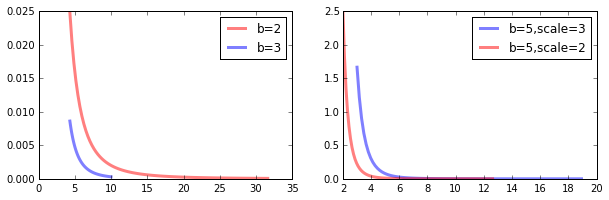

In [18]:
b=2
x = np.linspace(pareto.ppf(0.8, 1.1), pareto.ppf(0.999,b), 100)
fig = plt.figure(figsize=(10,3))
ax=fig.add_subplot(1,2,1)
plt.plot(x, pareto.pdf(x,b), 'r-', lw=3, alpha=0.5, label='b='+str(b))
b=3
x = np.linspace(pareto.ppf(0.8, 1.1), pareto.ppf(0.999,b), 100)
plt.plot(x, pareto.pdf(x, b), 'b-', lw=3, alpha=0.5, label='b='+str(b))
plt.legend(loc="best")

ax=fig.add_subplot(1,2,2)

b=5
scale=3

x = np.linspace(pareto.ppf(0.0001, b,scale=scale), pareto.ppf(0.9999,b,scale=scale), 100)
plt.plot(x, pareto.pdf(x, b,scale=scale), 'b-', lw=3, alpha=0.5, label='b=5,scale='+str(scale))


scale=2
x = np.linspace(pareto.ppf(0.0001, b,scale=scale), pareto.ppf(0.9999,b,scale=scale), 100)

plt.plot(x, pareto.pdf(x, b,scale=scale), 'r-', lw=3, alpha=0.5, label='b=5,scale='+str(scale))

plt.legend(loc="best")

 



## 分布拟合

+ 矩估计和极大似然估计

+ 我们这里说一下极大似然估计，其不单是估计分布的参数，在统计建模中，极大似然估计是模型参数估计的最重要工具。

+ 在数据分析中，我们常常要描述数据满足什么样的模型，比如对资产的收益率，分布就是对其的一种统计描述。分析出其遵循的分布，就是一种统计建模。

+ 那么用什么样的分布来对收益率进行建模呢？答案一定不是唯一的。我们需要选择一个最恰当的分布，使其能尽可能的刻画观测到的收益率数据。

+ 最常用的是参数模型方法。我们首先选择一种分布类型，比如正态分布，t分布，广义误差分布等。确定分布类型后，就将选择范围缩小在一类分布族中。比如正态分布族，由其位置参数和刻度参数（均值和方差）刻画。接下来就是要在该分布族内选择一个确定的分布，即确定分布的参数。这时就需要用大极大似然估计。

+ 极大似然估计的思想：在分布族中寻找使我们观测到的数据出现的几率最大的分布。这个几率用似然函数来刻画。

设 


+ 设${\bf{Y}} = {\left( {{Y_1}, \cdots ,{Y_n}} \right)^T}$ 为数据向量，
+ ${\bf{\theta }} = \left( {{\theta _1}, \cdots ,{\theta _p}} \right)^T$表示参数向量。
+ $f\left( {{\bf{Y}};{\bf{\theta }}} \right)$表示${\bf{Y}}$ 的密度函数，其是参数的函数。
+ 极大似然估计使$f\left( {{\bf{Y}};{\bf{\theta }}} \right)$ 取最大值。 称为$f\left( {{\bf{Y}};{\bf{\theta }}} \right)$似然函数，记为$L\left( {\bf{\theta }} \right)$ 。通常情况下对似然函数取对数会使估计更加容易， $\log \left\{ {L\left( {\bf{\theta }} \right)} \right\}$称为对数似然函数。因此，参数$\theta$极大似然估计$\hat{\theta}$用数学公式表示就是：

$$ \{ \hat\theta\} \subseteq \{ \underset{\theta\in\Theta}{\operatorname{arg\,max}}\ \log L(\theta) \},  $$

其中$\Theta$设定了参数的取值范围，比如正态分布，标准差的参数必须是大于0的。 

+ 一般来说，我们都假设${\bf{Y}} = {\left( {{Y_1}, \cdots ,{Y_n}} \right)^T}$中的观测是独立同分布的。 $f\left( {{\bf{Y}};{\bf{\theta }}} \right)$ 就是每一个$Y_i$分布的乘积。我们用正态分布的极大似然估计来说明一下。

+ 对正态分布，似然函数为 

$$L\left( {\bf{\theta }} \right) = \prod\limits_{i = 1}^n {\frac{1}{\sigma }\phi \left( {\frac{{{Y_i} - \mu }}{\sigma }} \right) = \frac{1}{{{\sigma ^n}{{\left( {2\pi } \right)}^{n/2}}}}\exp \left\{ {\frac{{ - 1}}{{2{\sigma ^2}}}\sum\limits_{i = 1}^n {{{\left( {{Y_i} - \mu } \right)}^2}} } \right\}.} $$
 
+ 对数似然函数为

$$\log \left\{ {L\left( {\bf{\theta }} \right)} \right\} =  - \frac{n}{2}\left\{ {\log \left( {{\sigma ^2}} \right) + \log \left( {2\pi } \right)} \right\} - \frac{1}{{2{\sigma ^2}}}\sum\limits_{i = 1}^n {{{\left( {{Y_i} - \mu } \right)}^2}} $$
 

+ 可以解得极大似然估计为
  $$\hat \mu  = \bar Y, \quad {\hat \sigma ^2} = \frac{1}{n}\sum\limits_{i = 1}^n {{{\left( {{Y_i} - \bar Y} \right)}^2}} $$

+ 优化

显然，极大似然估计的解并非都像正态分布那样有形式解，特别是在进行较复杂的统计建模时。如果没有形式解，我们就得借助优化方法。因此，在很多统计建模中，优化方法是非常重要的一步。如果模型设计得当，估计的优化算法效率高，方法就越适用。 因此，极大似然估计的问题就转化为优化问题：

$$\underset{\theta\in\Theta}{\operatorname{arg\,max}}\ \log L(\theta)$$

正态分布，t分布，pareto分布，GED分布(广义正态分布)的参数估计都可以用极大似然估计得到。下面的函数给出了这几种分布参数的极大似然估计。 

+ 正态分布：norm.fit()
+ t分布: t.fit()
+ pareto分布： pareto.fit()
+ GED分布：gennorm.fit()

下面我们用上证指数2012-2014四年的数据来对其对数收益率进行分布建模。
我们分别输出参数估计和相应的对数似然函数。

In [19]:
shindex=pd.read_csv("data/000001.csv",index_col=0,parse_dates=True)
shindex=shindex.ix["2012":"2014"]["close"]
logret=shindex.map(np.math.log)-shindex.shift().map(np.math.log)
logret=logret.ix[-logret.isnull()]
#ret=shindex.pct_change()
#logret=(1+ret).map(np.math.log)

 

In [20]:
par=norm.fit(logret)
loglik=np.array(map(np.math.log,norm.pdf(logret,loc=par[0],scale=par[1])))
 
print par,  "loglik="+ str(loglik.sum())

 

(0.00055101111101185218, 0.011140884396403599) loglik=2231.69146574


In [21]:
par=t.fit(logret)
loglik=np.array(map(np.math.log,t.pdf(logret,par[0],loc=par[1],scale=par[2])))
print par, loglik.sum()


(3.9446824284678641, 0.00035191173847921734, 0.0081281759421438313) 2266.9525263


In [22]:
par=gennorm.fit(logret)
loglik=np.array(map(np.math.log,gennorm.pdf(logret,par[0],loc=par[1],scale=par[2])))
print par, loglik.sum()

(1.0961140227502679, 0.00031362170825286248, 0.0090716837360116515) 2270.49022799


In [23]:
logretg=logret.ix[logret>0.01]
pareto.fit(logretg)

(3.8979, -0.0164, 0.0264)

###  估计的标准差

在统计分析中，我们常常希望知道估计得好不好，并且通常用参数估计量的标准差来刻画。当标准差小时，说明参数的不确定性小，数据给出了比较强的证据支持该参数的估计。如果估计参数的标准差大，说明该参数的不确定性比较大。我们知道在正态分布的极大似然估计的标准差可以推导得到。

从优化的视角看，如果似然函数的顶峰比较尖，即其极大值点非常陡峭，参数值的一点偏离都会使似然函数发生比较大的减小，则该极大似然估计是很好的。反之如果似然函数曲面顶峰比较平坦，参数值的变化不会带来太大的似然值的变化，这时优化效果以及参数估计的效果都不会好。极大似然估计的理论可以给出在大样本情形下，利用对数似然函数可以计算待估参数的标准差。


scipy.stats 中的fit方法只能给出参数的值，我们也可以利用数值Hessian估计计算极大似然估计的标准差，有兴趣的同学可以继续学习极大似然估计的相关理论和方法。[极大似然估计简单介绍](mle_introduction.pdf)


问题

1. 收益率分布建模的步骤
2. 极大似然估计
3. 正态分布的极大似然估计
4. 如何理解极大似然估计量的标准差